# Capstone #2: Modeling

The notebook shows the design abd comparison of various models to predict tht elength of the ICU stay from the `LengthOfStay.csv` data set.  This data set has already been cleaned, scaled and split in previous notebooks.

If necessary, remove the line comment delineater to install the following libraries.

In [ ]:
# %pip install --upgrade xgboost
# %pip install lightgbm
# %pip install catboost

Import the following libraries.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.inspection import permutation_importance
from sb_utils import save_file

Read the split data sets into the appropriate variables.

In [7]:
X_train = pd.read_csv('LengthOfStay_Xtrain.csv')
X_test = pd.read_csv('LengthOfStay_Xtest.csv')
y_train = pd.read_csv('LengthOfStay_ytrain.csv')
y_test = pd.read_csv('LengthOfStay_ytest.csv')
X_train.head()

dialysisrenalendstage  asthma  irondef  pneum  substancedependence  \
0                      0       0        0      0                    0   
1                      0       0        0      0                    0   
2                      1       0        1      0                    0   
3                      0       0        0      0                    0   
4                      0       0        0      0                    0   

   psychologicaldisordermajor  depress  psychother  fibrosisandother  \
0                           0        0           0                 0   
1                           0        0           0                 0   
2                           1        0           0                 0   
3                           0        0           0                 0   
4                           0        0           0                 0   

   malnutrition  ...  hematocrit  neutrophils    sodium   glucose  \
0             0  ...    0.405541    -0.388013  1.972879  1.071466   
1             0  ...   -1.169239     0.284490 -0.102962 -0.593133   
2             0  ...   -1.956629    -1.209962 -0.707863  1.307013   
3             0  ...   -0.037366    -0.145165  0.631417 -0.456319   
4             0  ...   -1.021603     1.834983  1.397983 -0.275216   

   bloodureanitro  creatinine       bmi     pulse  respiration  \
0        1.639717   -0.409788  0.081591 -0.982775     0.010962   
1       -0.187704   -0.263720  0.071832  0.391208     0.010962   
2        1.591627    0.776118 -0.626783  0.305334    -1.572460   
3       -0.187704   -0.595490  0.374475 -0.381657     0.010962   
4       -0.187704    0.171147 -1.632482  0.219460     0.010962   

   readmission_int  
0        -0.724748  
1         1.867584  
2        -0.076665  
3        -0.076665  
4        -0.724748  

[5 rows x 36 columns]

## Screening Models

In the first stage, I'll test the following regression models with default hyperparameters to determine which model gives the best starting point.  The models will be evaluated using the Mean Absolute Error (MAE) and R-squared metrics.

1. Linear Regression
2. Support Vector Machine (SVM)
3. Random Forest Regressor
4. Gradient Boot Regressor

### 1. Linear Regression

In [114]:
y_train = y_train.values.ravel()

In [107]:
#Run default linear regression on dataset
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

0.7629027814305008

In [108]:
#Determine MAE with test data
y_pred_LR = np.array(LR.predict(X_test))
mae_LR = mean_absolute_error(y_test, y_pred_LR)
print(f'Linear Regression MAE: {mae_LR}')

Linear Regression MAE: 0.8774046632565952


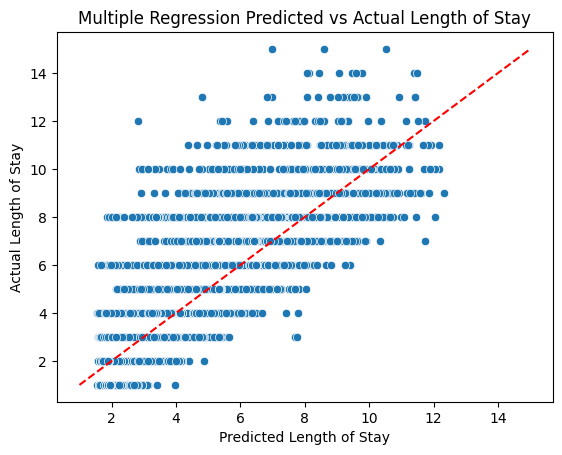

In [ ]:
#Plot actual y_test vs predicted y_pred in scatterplot
y_test_1D = y_test.values.ravel()
sns.scatterplot(x=y_pred_LR, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('Multiple Regression Predicted vs Actual Length of Stay')
plt.show()

### 2. Support Vector Machine (SVM)

In [116]:
#Run default SVM on dataset
SR = LinearSVR(max_iter=10000)
SR.fit(X_train, y_train)
SR.score(X_train, y_train)

0.7506020456247855

In [117]:
#Determine MAE with test data
y_pred_SR = np.array(SR.predict(X_test))
mae_SR = mean_absolute_error(y_test, y_pred_SR)
print(f'SVM MAE: {mae_SR}')

SVM MAE: 0.8537333365420724


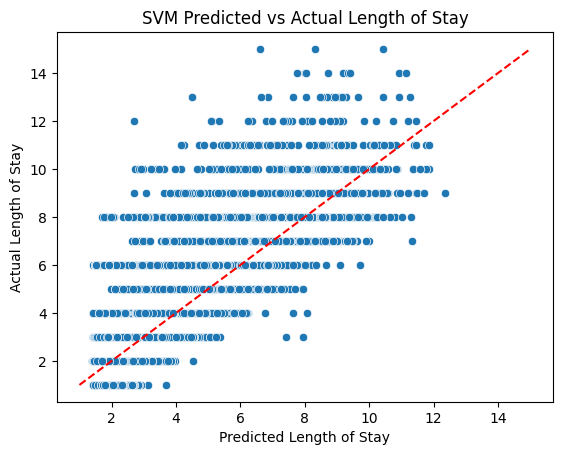

In [118]:
#Plot actual y_test vs predicted y_pred in scatterplot
y_test_1D = y_test.values.ravel()
sns.scatterplot(x=y_pred_SR, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('SVM Predicted vs Actual Length of Stay')
plt.show()

### 3. Random Forest Regressor

In [109]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF.score(X_train, y_train)

0.989080404487373

In [110]:
#Determine MAE with test data
y_pred_RF = np.array(RF.predict(X_test))
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print(f'Random Forest MAE: {mae_RF}')

Random Forest MAE: 0.3964035052618943


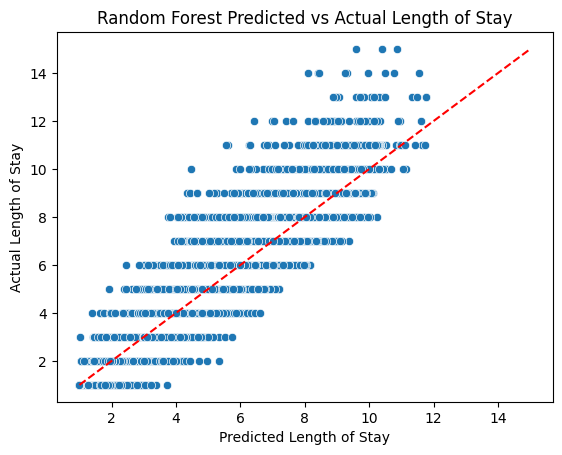

In [119]:
#Plot actual y_test vs predicted y_pred in scatterplot
y_test_1D = y_test.values.ravel()
sns.scatterplot(x=y_pred_RF, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('Random Forest Predicted vs Actual Length of Stay')
plt.show()

### 4. Gradient Boost Regressor

Here we will compare multple types of Gradient Boost algorithms:
- GradientBoostRegressor
- XGBoost
- LiteGBM
- CatBoost

In [121]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
GB.score(X_train, y_train)

0.9354995681921779

In [122]:
#Determine MAE with test data
y_pred_GB = np.array(GB.predict(X_test))
mae_GB = mean_absolute_error(y_test, y_pred_GB)
print(f'Gradient Boost Regressor MAE: {mae_GB}')

Gradient Boost Regressor MAE: 0.448570980219628


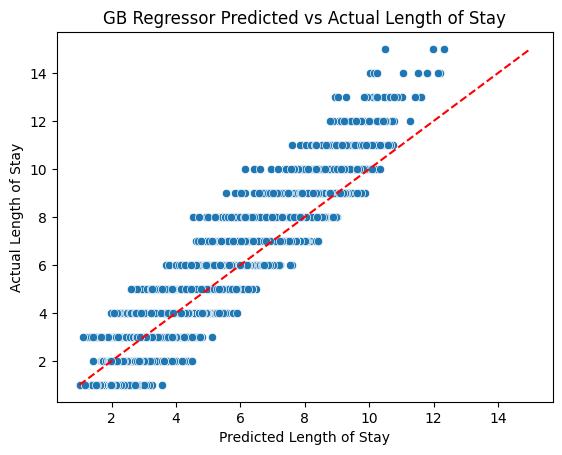

In [123]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_GB, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('GB Regressor Predicted vs Actual Length of Stay')
plt.show()

In [124]:
XG = XGBRegressor()
XG.fit(X_train, y_train)
XG.score(X_train, y_train)

0.97540682554245

In [125]:
#Determine MAE with test data
y_pred_XG = np.array(XG.predict(X_test))
mae_XG = mean_absolute_error(y_test, y_pred_XG)
print(f'Gradient Boost Regressor MAE: {mae_XG}')

Gradient Boost Regressor MAE: 0.3351593315601349


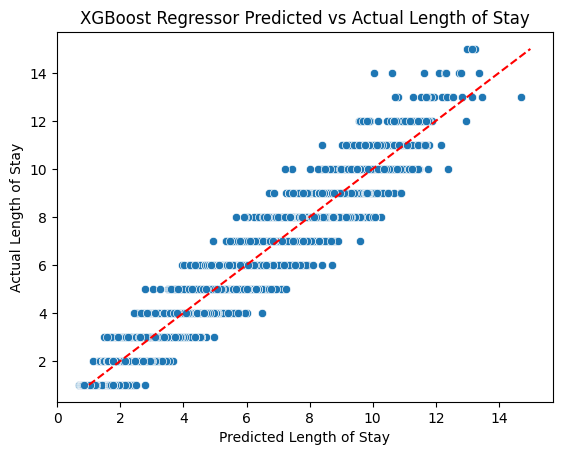

In [126]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_XG, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('XGBoost Regressor Predicted vs Actual Length of Stay')
plt.show()

In [127]:
LG = LGBMRegressor()
LG.fit(X_train, y_train)
LG.score(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1943
[LightGBM] [Info] Number of data points in the train set: 74971, number of used features: 36
[LightGBM] [Info] Start training from score 3.998293


0.9645075287307978

In [128]:
#Determine MAE with test data
y_pred_LG = np.array(LG.predict(X_test))
mae_LG = mean_absolute_error(y_test, y_pred_LG)
print(f'Gradient Boost Regressor MAE: {mae_LG}')

Gradient Boost Regressor MAE: 0.33833656261498685


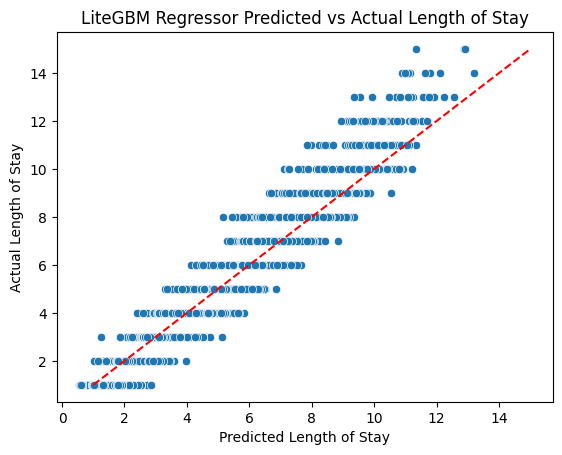

In [129]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_LG, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('LiteGBM Regressor Predicted vs Actual Length of Stay')
plt.show()

In [29]:
CB = CatBoostRegressor()
CB.fit(X_train, y_train)
CB.score(X_train, y_train)

Learning rate set to 0.080987
0:	learn: 2.2261905	total: 21.6ms	remaining: 21.6s
1:	learn: 2.1054905	total: 45.5ms	remaining: 22.7s
2:	learn: 1.9979225	total: 61.1ms	remaining: 20.3s
3:	learn: 1.8992100	total: 79.8ms	remaining: 19.9s
4:	learn: 1.8080113	total: 100ms	remaining: 19.9s
5:	learn: 1.7272157	total: 125ms	remaining: 20.7s
6:	learn: 1.6563638	total: 141ms	remaining: 20s
7:	learn: 1.5902243	total: 156ms	remaining: 19.3s
8:	learn: 1.5299196	total: 171ms	remaining: 18.9s
9:	learn: 1.4762804	total: 187ms	remaining: 18.5s
10:	learn: 1.4270153	total: 204ms	remaining: 18.3s
11:	learn: 1.3815949	total: 229ms	remaining: 18.9s
12:	learn: 1.3417733	total: 245ms	remaining: 18.6s
13:	learn: 1.3070942	total: 260ms	remaining: 18.3s
14:	learn: 1.2728278	total: 275ms	remaining: 18s
15:	learn: 1.2433412	total: 292ms	remaining: 18s
16:	learn: 1.2153707	total: 307ms	remaining: 17.8s
17:	learn: 1.1883945	total: 323ms	remaining: 17.6s
18:	learn: 1.1617742	total: 339ms	remaining: 17.5s
19:	learn: 1.

np.float64(0.9772169232828124)

In [30]:
#Determine MAE with test data
y_pred_CB = np.array(CB.predict(X_test))
mae_CB = mean_absolute_error(y_test, y_pred_CB)
print(f'CatBoost Regressor MAE: {mae_CB}')

CatBoost Regressor MAE: 0.2940773609760559


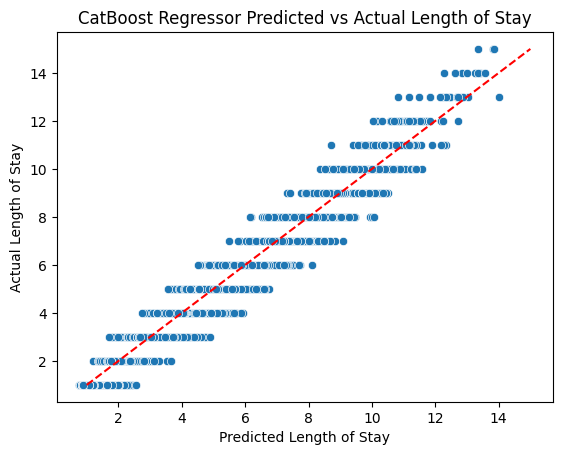

In [132]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_CB, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('CatBoost Regressor Predicted vs Actual Length of Stay')
plt.show()

### Summary of Model Screening 

In [133]:
MAE_dict = {'Multiple Linear Regression': mae_LR, 'SVM Regressor': mae_SR, 'Random Forest Regressor': mae_RF, 
            'Gradient Boost Regressor': mae_GB, 'XGBoost Regressor': mae_XG, 'LiteGBM Regressor': mae_LG, 'CatBoost Regressor': mae_CB}
Rsquared_dict = {'Multiple Linear Regression': LR.score(X_train, y_train), 'SVM Regressor': SR.score(X_train, y_train), 
                 'Random Forest Regressor': RF.score(X_train, y_train), 'Gradient Boost Regressor': GB.score(X_train, y_train), 
                 'XGBoost Regressor': XG.score(X_train, y_train), 'LiteGBM Regressor': LG.score(X_train, y_train), 'CatBoost Regressor': CB.score(X_train, y_train)}
Comment_dict = {'Multiple Linear Regression': 'No', 'SVM Regressor': 'No', 'Random Forest Regressor': 'No', 
            'Gradient Boost Regressor': 'No', 'XGBoost Regressor': 'Yes', 'LiteGBM Regressor': 'Yes', 'CatBoost Regressor': 'Yes'}
summary = pd.DataFrame({'MAE': MAE_dict, 'R²': Rsquared_dict, 'Accurate for Long Stays?': Comment_dict})
summary

MAE        R² Accurate for Long Stays?
Multiple Linear Regression  0.877405  0.762903                       No
SVM Regressor               0.853733  0.750602                       No
Random Forest Regressor     0.396404  0.989080                       No
Gradient Boost Regressor    0.448571  0.935500                       No
XGBoost Regressor           0.335159  0.975407                      Yes
LiteGBM Regressor           0.338337  0.964508                      Yes
CatBoost Regressor          0.294077  0.977217                      Yes

In this table, we can compare the error and R-squared metrics for all seven models that were tested above.  In addition, I have added a more subjective metric, which was whether the model maintained accuracy when prediciting the length of stay for patients in the test data with longer ICU stays.  When examining the scatter plots, I noticed that some models were specifically under estimating the longer admissions.  This was clearest for Random Forest and the Gradient Boost Regressor, where accuracy overall was good enough for the trend to be visible.  From a business perspecitive, it is plausible that accurate predictions for long stays would be mort important than shorter stays.  In fact the entire purpose of the project could be to pick out the patients who will stays over 10 days, or someting similar.  For this reason, I think it is important to keep this in mind when evaluating these models.

As one would anticipate, these results show a clear improvement in MAE and R-squared as we move from base learners like Linear Regression and SVM to ensemble learers like Random Forest and Gradient Boosting.  Even within Gradient Boosting, there is a clear improvement from the Gradient Boost Regressor through newer learners like CatBoost.

CatBoost Regressor is a clear choice for moving forward in this project, as it has the lowest error, a very high Rsquared and maintains accuracy for longer hospital stays.  In addition, I will select the XGBoost Regressor and Random Forest Regressor for further development.  These will be included as a point of comparison to the CatBoost Regressor (and for my own education).

# Model Building

In the following section, I will building three complete models and compare the final results using the following learners:

1. Random Foorest Regressor
2. XGBoost Regressor
3. CatBoost Regressor

For each model, I will show:

1. Hyperparameter tuning using RandomizedSearchCV
2. Model training using the optimal parameters
3. Model assessment

## Random Forest

In [57]:
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_features': [0.25, 0.5, 0.75, 1.0, 'sqrt'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    }

RF = RandomForestRegressor()
RF_cv= RandomizedSearchCV(RF,param_grid_RF, cv=5, scoring='neg_mean_absolute_error')
RF_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': [0.25, 0.5, 0.75, 1.0,
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_absolute_error')

In [58]:
results_RF = pd.DataFrame(RF_cv.cv_results_)
top_10_RF = results_RF.sort_values(by='mean_test_score', ascending=False).head(10)
params_expanded = pd.json_normalize(top_10_RF['params'])
top_10_full_RF = pd.concat([top_10_RF[["rank_test_score", "mean_test_score"]].reset_index(drop=True), params_expanded.reset_index(drop=True)], axis=1)
top_10_full_RF['Mean MAE'] = top_10_full_RF['mean_test_score']*-1
top_10_full_RF = top_10_full_RF.drop('mean_test_score', axis=1)
top_10_full_RF

rank_test_score  n_estimators  min_samples_split  min_samples_leaf  \
0                1           200                  5                 2   
1                2           100                  5                 5   
2                3           100                 10                 2   
3                4           100                  2                10   
4                5           100                  5                 5   
5                6           300                  5                 5   
6                7           200                 20                10   
7                8           100                  5                 2   
8                9           200                 10                10   
9               10           100                 10                 1   

  max_features  max_depth  Mean MAE  
0          0.5         20  0.452518  
1         0.75         10  0.687260  
2         0.25         10  0.703450  
3         0.25         10  0.703936  
4         sqrt         10  0.774270  
5          0.5          5  0.866083  
6          0.5          5  0.866837  
7          0.5          5  0.868721  
8         0.75          5  0.871432  
9          1.0          5  0.895882

In [4]:
RF_model = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=.25, max_depth=None)
RF_model = RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

In [5]:
y_pred_RFmodel = RF_model.predict(X_test)
Rsquared_RFmodel = RF_model.score(X_train, y_train)
mea_RFmodel = mean_absolute_error(y_test, y_pred_RF)
RMSE_RFmodel = root_mean_squared_error(y_test, y_pred_RF)
RF_model_metrics = {'R-squared': Rsquared_RFmodel, 'MAE': mea_RFmodel, 'RMSE':RMSE_RFmodel}
RF_model_metrics

{'R-squared': 0.9779924582528988,
 'MAE': 0.41552658616371474,
 'RMSE': 0.6466663112425062}

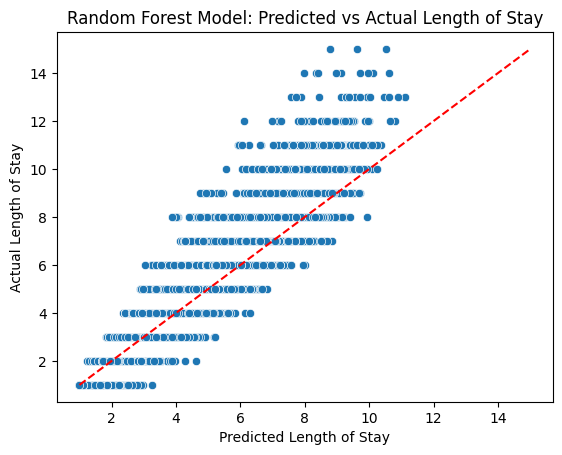

In [6]:
#Plot actual y_test vs predicted y_pred in scatterplot
y_test_1D = y_test.values.ravel()
sns.scatterplot(x=y_pred_RFmodel, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('Random Forest Model: Predicted vs Actual Length of Stay')
plt.show()

In [ ]:
#Calculate the relative features importances using permutation_importance
feature_names = X_test.columns
perm_RF = permutation_importance(RF_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

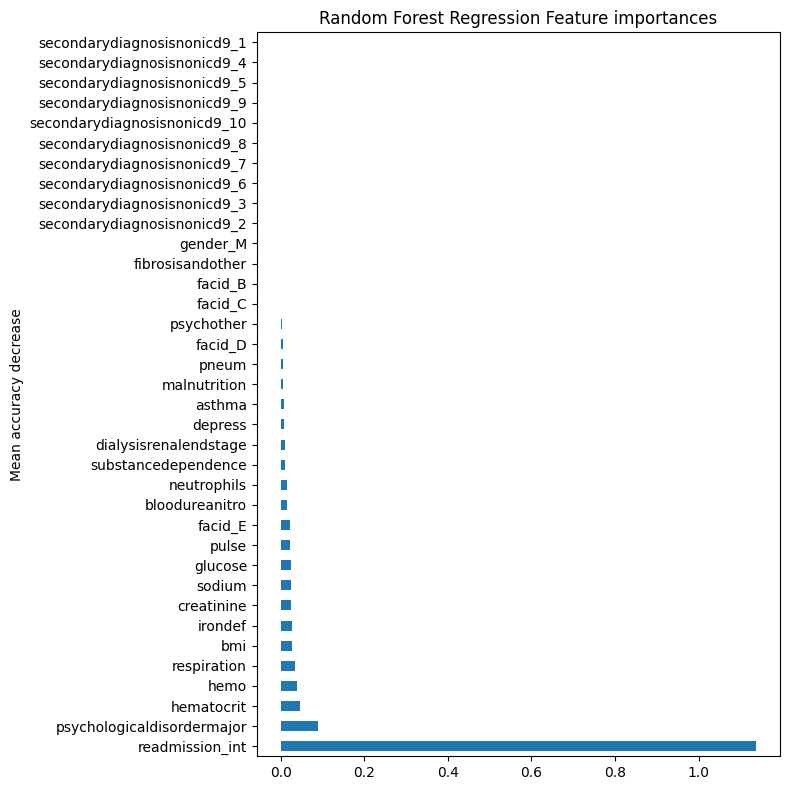

In [ ]:
#Transform feature importance data into series for plotting
importances_mean_RF = pd.Series(perm_RF.importances_mean, index=feature_names).sort_values(ascending=False)
importances_std_RF = pd.Series(perm_RF.importances_std, index=feature_names).loc[importances_mean_RF.index]

#Plot feature importances
fig, ax = plt.subplots(figsize=(8,8))
importances_mean_RF.plot.barh(yerr=importances_std_RF, ax=ax)
ax.set_title("Random Forest Regression Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Hyperparameter tuning was unable to sufficiently improve the predictions from the Random Forest Regressor learner.  When the predictions were plotted against the y_test actual labels, it appears that parameter tuning tighteded the variance of the predictions but could not address the issue of under estimating the high end of range of admission lengths. 

## XGBoost Regressor

In [24]:
param_grid_XGB = {
    'learning_rate': np.arange(0.01, 1, 0.1),
    'min_child_weight': [10, 25, 50, 75, 100],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'colsample_bytree': [0.5, 0.7, 0.8, 0.9, 1],
    'n_estimators': [200, 250, 300, 350]
}
XGB = XGBRegressor()
XGB_cv = RandomizedSearchCV(estimator=XGB, param_distributions=param_grid_XGB, cv=5, scoring='neg_mean_absolute_error')

XGB_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.8, 0.9,
                                                             1],
                                        'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12],
                                        'min_child_weight': [10, 25, 50, 75,
                                                             100],
                                        'n_estimators': [200, 250, 300, 350]},
                   scoring='neg_mean_absolute_error')

In [45]:
results_XGB = pd.DataFrame(XGB_cv.cv_results_)
top_10_XGB = results_XGB.sort_values(by='mean_test_score', ascending=False).head(10)
params_expanded = pd.json_normalize(top_10_XGB['params'])
top_10_XGB_full = pd.concat([top_10_XGB[["rank_test_score", "mean_test_score"]].reset_index(drop=True), params_expanded.reset_index(drop=True)], axis=1)
top_10_XGB_full['Mean MAE'] = top_10_XGB_full['mean_test_score']*-1
top_10_XGB_full = top_10_XGB_full.drop('mean_test_score', axis=1)
top_10_XGB_full

rank_test_score  n_estimators  min_child_weight  max_depth  learning_rate  \
0                1           300                50         10           0.21   
1                2           300               100          6           0.21   
2                3           200                10         10           0.11   
3                4           200               100          7           0.11   
4                5           250                25          4           0.21   
5                6           350                10         11           0.31   
6                7           350               100         10           0.61   
7                8           250                50          7           0.91   
8                9           350                75         11           0.81   
9               10           200               100         10           0.91   

   colsample_bytree  Mean MAE  
0               0.7  0.319047  
1               1.0  0.322131  
2               0.5  0.322600  
3               0.9  0.323784  
4               1.0  0.337420  
5               0.7  0.341597  
6               0.7  0.383548  
7               0.7  0.400128  
8               0.8  0.438553  
9               1.0  0.444688

In [26]:
XGB_model = XGBRegressor(n_estimators=300, min_child_weight=50, learning_rate=0.21, colsample_bytree=0.7, max_depth=10)
XGB_model = XGB_model.fit(X_train, y_train)
y_pred_XGB = XGB_model.predict(X_test)

In [27]:
y_pred_XGBmodel = XGB_model.predict(X_test)
Rsquared_XGBmodel = XGB_model.score(X_train, y_train)
mea_XGBmodel = mean_absolute_error(y_test, y_pred_XGB)
RMSE_XGBmodel = root_mean_squared_error(y_test, y_pred_XGB)
XGB_model_metrics = {'R-squared': Rsquared_XGBmodel, 'MAE': mea_XGBmodel, 'RMSE':RMSE_XGBmodel}
XGB_model_metrics

{'R-squared': 0.9878109693527222,
 'MAE': 0.31357118487358093,
 'RMSE': 0.4385029971599579}

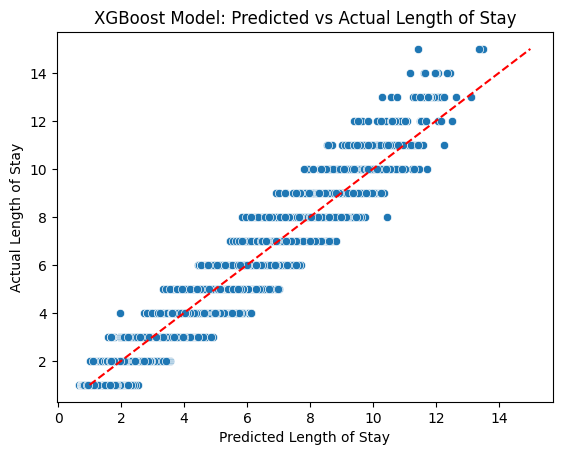

In [28]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_XGBmodel, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('XGBoost Model: Predicted vs Actual Length of Stay')
plt.show()

In [29]:
#Calculate the relative features importances using permutation_importance
feature_names = X_test.columns
perm_XGB = permutation_importance(XGB_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

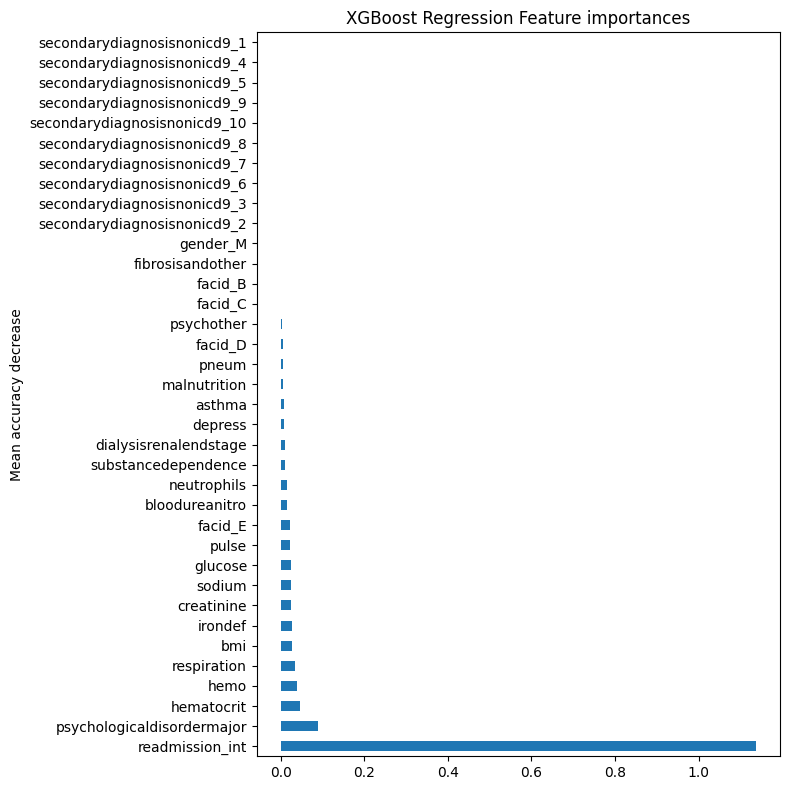

In [31]:
#Transform feature importance data into series for plotting
importances_mean_XGB = pd.Series(perm_XGB.importances_mean, index=feature_names).sort_values(ascending=False)
importances_std_XGB = pd.Series(perm_XGB.importances_std, index=feature_names).loc[importances_mean_XGB.index]

#Plot feature importances
fig, ax = plt.subplots(figsize=(8,8))
importances_mean_RF.plot.barh(yerr=importances_std_XGB, ax=ax)
ax.set_title("XGBoost Regression Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## CatBoost Regressor

In [ ]:
param_grid_CB = {
    'learning_rate': [.001, .005, .01, .03, .05, .1],
    'depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'iterations': [500, 750, 1000, 1250],
    'l2_leaf_reg': [3, 6, 7, 8, 9, 10],
    'random_strength' : [1, 2, 5, 10]
}
CB = CatBoostRegressor()
CB_cv = RandomizedSearchCV(estimator=CB, param_distributions=param_grid_CB, cv=5, scoring='neg_mean_absolute_error')

CB_cv.fit(X_train, y_train)

In [44]:
results_CB = pd.DataFrame(CB_cv.cv_results_)
top_10_CB = results_CB.sort_values(by='mean_test_score', ascending=False).head(10)
params_expanded = pd.json_normalize(top_10_CB['params'])
top_10_CB_full = pd.concat([top_10_CB[["rank_test_score", "mean_test_score"]].reset_index(drop=True), params_expanded.reset_index(drop=True)], axis=1)
top_10_CB_full['Mean MAE'] = top_10_CB_full['mean_test_score']*-1
top_10_CB_full = top_10_CB_full.drop('mean_test_score', axis=1)
top_10_CB_full

rank_test_score  random_strength  learning_rate  l2_leaf_reg  iterations  \
0                1               10           0.05            6        1000   
1                2                5           0.05            8        1250   
2                3                2           0.05            3        1000   
3                4                2           0.03            6         750   
4                5                1           0.05            3         750   
5                6                1           0.01            9         750   
6                7               10           0.03            7         750   
7                8                2           0.01            6         750   
8                9                2           0.03            6         750   
9               10                1           0.01            7         750   

   depth  Mean MAE  
0     11  0.288483  
1      8  0.289101  
2     12  0.289316  
3      8  0.303447  
4      6  0.307810  
5     10  0.361331  
6      6  0.363518  
7      9  0.380195  
8      3  0.418753  
9      6  0.421852

In [134]:
CB_model = CatBoostRegressor(learning_rate=0.05, random_strength=10, depth = 11, l2_leaf_reg=6, iterations=1000)
CB_model = CB_model.fit(X_train, y_train)
y_pred_CBmodel = CB_model.predict(X_test)

0:	learn: 2.2871085	total: 247ms	remaining: 4m 6s
1:	learn: 2.2146410	total: 387ms	remaining: 3m 13s
2:	learn: 2.1419624	total: 654ms	remaining: 3m 37s
3:	learn: 2.0737273	total: 830ms	remaining: 3m 26s
4:	learn: 2.0166242	total: 1.01s	remaining: 3m 21s
5:	learn: 1.9579574	total: 1.18s	remaining: 3m 15s
6:	learn: 1.9014327	total: 1.38s	remaining: 3m 15s
7:	learn: 1.8537885	total: 1.6s	remaining: 3m 18s
8:	learn: 1.8010763	total: 1.83s	remaining: 3m 21s
9:	learn: 1.7554626	total: 2.04s	remaining: 3m 21s
10:	learn: 1.7118847	total: 2.21s	remaining: 3m 18s
11:	learn: 1.6702761	total: 2.37s	remaining: 3m 15s
12:	learn: 1.6286225	total: 2.5s	remaining: 3m 9s
13:	learn: 1.5909961	total: 2.52s	remaining: 2m 57s
14:	learn: 1.5547210	total: 2.72s	remaining: 2m 58s
15:	learn: 1.5218095	total: 2.88s	remaining: 2m 56s
16:	learn: 1.4881195	total: 3.04s	remaining: 2m 55s
17:	learn: 1.4548956	total: 3.18s	remaining: 2m 53s
18:	learn: 1.4312703	total: 3.25s	remaining: 2m 47s
19:	learn: 1.4035121	total

In [ ]:
Rsquared_CBmodel = CB_model.score(X_train, y_train)
mea_CBmodel = mean_absolute_error(y_test, y_pred_CBmodel)
RMSE_CBmodel = root_mean_squared_error(y_test, y_pred_CBmodel)
CB_model_metrics = {'R-squared': Rsquared_CBmodel, 'MAE': mea_CBmodel, 'RMSE':RMSE_CBmodel}
CB_model_metrics

{'R-squared': np.float64(0.9837985547866464),
 'MAE': 0.2842504096805775,
 'RMSE': 0.40702883361493813}

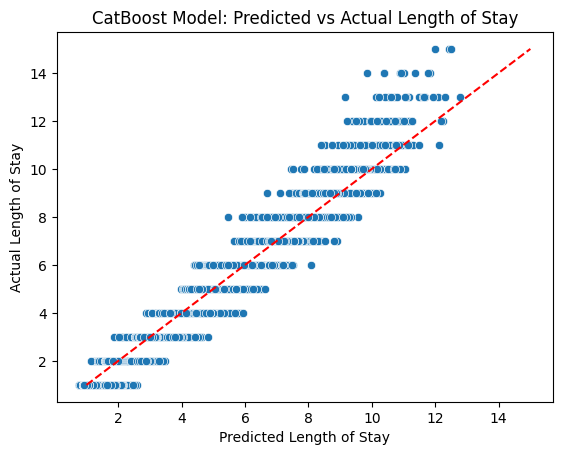

In [ ]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_CBmodel, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('CatBoost Model: Predicted vs Actual Length of Stay')
plt.show()

In [64]:
#Calculate the relative features importances using permutation_importance
perm_CB = permutation_importance(CB_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

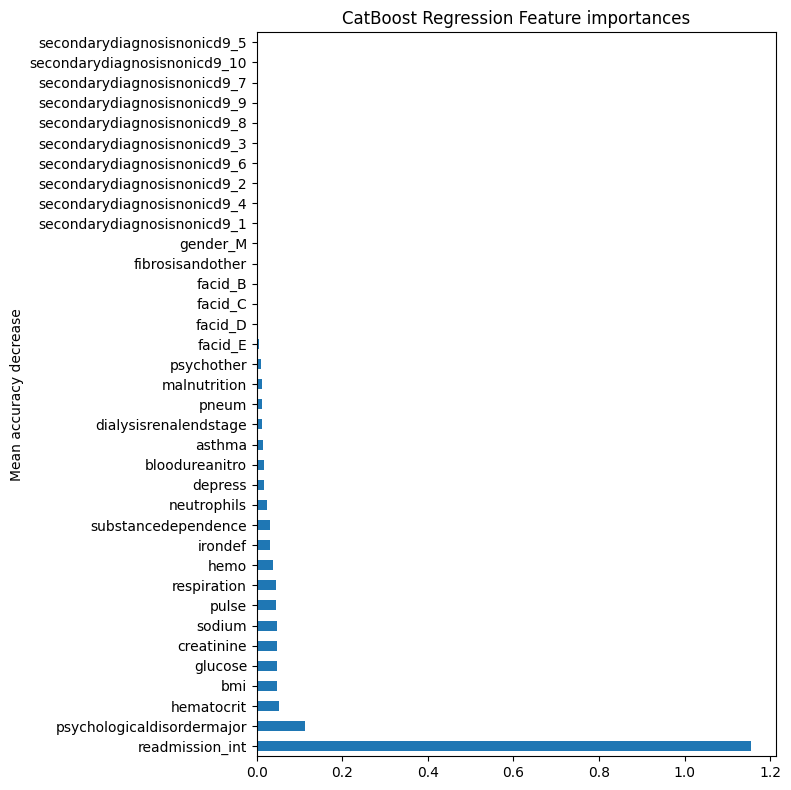

In [77]:
#Transform feature importance data into series for plotting
importances_mean_CB = pd.Series(perm_CB.importances_mean, index=feature_names).sort_values(ascending=False)
importances_std_CB = pd.Series(perm_CB.importances_std, index=feature_names).loc[importances_mean_XGB.index]

#Plot feature importances
fig, ax = plt.subplots(figsize=(8,8))
importances_mean_CB.plot.barh(yerr=importances_std_CB, ax=ax)
ax.set_title("CatBoost Regression Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Model Selection

### Summary of Model Building

In [28]:
summary_models = pd.DataFrame({'Random Forest regressor': RF_model_metrics, 'XGBoost Regressor': XGB_model_metrics, 'CatBoost Regressor': CB_model_metrics})
summary_models

NameError: name 'RF_model_metrics' is not defined

- Random Forest Regressor: Hyperparameter tuning was unable to improve the results of the Random Forest learner for the longer admissions in our test dataset.  This model was the worst of the three and will not be continued.
- XGBoost Regressor: Hyperparameter tuning yeilded modest improvements in R-squared and MAE metrics.  However, this model appeared to be the most accurate for admissions above 10 days.
- CatBoost Regressor: This model had the lowest MAE, both at defalut hyperparameters (MAE=29.4) and after hyperparameter tuning (MAE=28.8).  However, visual inspection of the scatter plot comparing actual to predicted labels for test data suggests that hyperparameter tuning led to underestimation of admissions above 10 days, even as the mean MAE decreased.

All of the gradient boosting based models tested so far have similar MAE and R2, especially for shorter admissions.  In order to better differentiate between these models, I'll look at MAE for stays above and below 10 days, where predictions appear less consistent.

In [ ]:
y_test = np.asarray(y_test).ravel()
ytest_lt_10 = y_test < 10
ytest_ge_10 = y_test >= 10

models = ['Random Forest default', 'Random Forest model', 'XGBoost default', 'XGBoost model','CatBoost default', 'CatBoost model']
y_pred_list = [y_pred_RF, y_pred_RFmodel, y_pred_XG, y_pred_XGBmodel, y_pred_CB, y_pred_CBmodel]
MAE_lt_10 = []
MAE_ge_10 = []
for ypred in y_pred_list:
    ypred=np.asarray(ypred).ravel()
    mae_lt_10 = mean_absolute_error(y_test[ytest_lt_10], ypred[ytest_lt_10])
    mae_ge_10 = mean_absolute_error(y_test[ytest_ge_10], ypred[ytest_ge_10])
    MAE_lt_10.append(mae_lt_10)
    MAE_ge_10.append(mae_ge_10)
summary_10 = pd.DataFrame({'MAE < 10 days':MAE_lt_10, 'MAE >= 10 days':MAE_ge_10}, index=models)

In [ ]:
summary_10

MAE < 10 days  MAE >= 10 days
Random Forest default       0.389067        2.038061
Random Forest model         0.389067        2.038061
XGBoost default             0.328586        0.738226
XGBoost model               0.306385        0.754233
CatBoost default            0.290250        0.528774
CatBoost model              0.274464        0.884345

These results clearly show that the default CatBoost settings is the learner with the lowest error for admissions of 10 or more days.  Given that these stays are most likely to be important from a business perspective, I recommend using CatBoost with default settings as the final model.

During our model building, we collected data on the features which were most important to each model.  

In [ ]:
# Loop through features lists of the top 10 t0 t0p 30 features to determine how many features are needed to maintain MAE in the CatBoost learner.
MAE_lt_10 = []
MAE_ge_10 = []
features = range(10, 31)
for i in features:
    X_train_short = X_train[importances_mean_CB.index[:i]]
    X_test_short = X_test[importances_mean_CB.index[:i]]
    CB_short = CatBoostRegressor()
    CB_short.fit(X_train_short, y_train)
    y_pred_CBshort = CB_short.predict(X_test_short)
    y_pred_CBshort=np.asarray(y_pred_CBshort).ravel()
    mae_lt_10 = mean_absolute_error(y_test[ytest_lt_10], y_pred_CBshort[ytest_lt_10])
    mae_ge_10 = mean_absolute_error(y_test[ytest_ge_10], y_pred_CBshort[ytest_ge_10])
    MAE_lt_10.append(mae_lt_10)
    MAE_ge_10.append(mae_ge_10)
summary_10short = pd.DataFrame({'MAE < 10':MAE_lt_10, 'MAE >= 10':MAE_ge_10}, index=features)

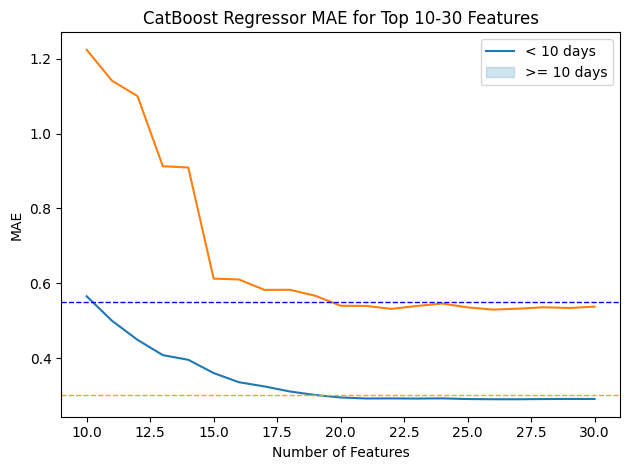

In [ ]:
summary_10short = pd.DataFrame({'MAE < 10':MAE_lt_10, 'MAE >= 10':MAE_ge_10}, index=features)
sns.lineplot(data=summary_10short, x=features, y='MAE < 10')
sns.lineplot(data=summary_10short, x=features, y='MAE >= 10')
plt.axhline(y=0.55, color='blue', linestyle='--', linewidth=1)
plt.axhline(y=0.3, color='orange', linestyle='--', linewidth=1)
plt.title('CatBoost Regressor MAE for Top 10-30 Features')
plt.xlabel('Number of Features')
plt.ylabel('MAE')
plt.legend(["< 10 days", ">= 10 days"], loc="upper right")
plt.tight_layout()
plt.show()

In [ ]:
# Print specific MAE value for 15 features
summary_10short.loc[15]

MAE < 10     0.359820
MAE >= 10    0.612283
Name: 15, dtype: float64

In [ ]:
# Print specific MAE value for 15 features
summary_10short.loc[20]

MAE < 10     0.294591
MAE >= 10    0.539755
Name: 20, dtype: float64

Based on the above plot, the CatBoostRegressor learner requires the top 20 features to maintain MAE below 0.55 for the admissions of 10 or more days and MAE below 0.3 for admissions below 10 days.  The client could also use the top 15 features if this level of accuracy is not required. In descending order, the top 20 features are as follows:
- Number of Readmissions
- Psychological Disorder (Yes/No)
- Hemotocrit
- BMI
- Glucose
- Creatinine
- Sodium
- Pulse
- Respriation
- Hemo
- Iron Deficiency (Yes/No)
- Substance Dependence (Yes/No)
- Neutrophils
- Depression (Yes/No)
- Blood Urea Nitrogen
- Asthma (Yes/No)
- Dialysis for End-Stage Renal Failure (Yes/No)
- Pneumonia (Yes/No)
- Malnutrition (Yes/No)
- Presence of Other Psychological Symptoms (Yes/No)

## Alternative Model for Unknown Prior Admissions

The model created above relies heavily on the number of prior readmissions in order to predict the length of the current admission.  In practice, this data may not always be available.  The current model could handle making predicitons for patients with other missing data, but might be unable to function accurately for patients with unknown prior admissions. To address this, I will create an alternative CatBoost model for predicting the length of stay for patients with unknown prior admissions and compare it to the current model on X_test where all `readmission_int` values are set to 0.

In [34]:
#Remove readmission_int from training and test data
X_train_alt = X_train.drop('readmission_int', axis=1)
X_test_alt = X_test.drop('readmission_int', axis=1)

# Test default CatBoostRegressor on alternative X_train
CB_alt = CatBoostRegressor()
CB_alt = CB_alt.fit(X_train_alt, y_train)
y_pred_CBalt = CB_alt.predict(X_test)

Learning rate set to 0.080987
0:	learn: 2.3234346	total: 37ms	remaining: 36.9s
1:	learn: 2.2904093	total: 71.7ms	remaining: 35.8s
2:	learn: 2.2604828	total: 98.7ms	remaining: 32.8s
3:	learn: 2.2338089	total: 117ms	remaining: 29.1s
4:	learn: 2.2109478	total: 137ms	remaining: 27.2s
5:	learn: 2.1910533	total: 162ms	remaining: 26.8s
6:	learn: 2.1734716	total: 186ms	remaining: 26.4s
7:	learn: 2.1575660	total: 303ms	remaining: 37.6s
8:	learn: 2.1429106	total: 428ms	remaining: 47.1s
9:	learn: 2.1282020	total: 466ms	remaining: 46.1s
10:	learn: 2.1159606	total: 483ms	remaining: 43.4s
11:	learn: 2.1041038	total: 501ms	remaining: 41.2s
12:	learn: 2.0937031	total: 526ms	remaining: 40s
13:	learn: 2.0835656	total: 557ms	remaining: 39.3s
14:	learn: 2.0732743	total: 574ms	remaining: 37.7s
15:	learn: 2.0639607	total: 590ms	remaining: 36.3s
16:	learn: 2.0550006	total: 607ms	remaining: 35.1s
17:	learn: 2.0459053	total: 625ms	remaining: 34.1s
18:	learn: 2.0380675	total: 643ms	remaining: 33.2s
19:	learn: 2

In [35]:
#Collect metrics on default model
Rsquared_CBalt = CB_alt.score(X_train_alt, y_train)
mea_CBalt = mean_absolute_error(y_test, y_pred_CBalt)
RMSE_CBalt = root_mean_squared_error(y_test, y_pred_CBalt)
CB_alt_metrics = {'R-squared': Rsquared_CBalt, 'MAE': mea_CBalt, 'RMSE':RMSE_CBalt}
CB_alt_metrics

{'R-squared': np.float64(0.4472005981014425),
 'MAE': 1.5360145296328547,
 'RMSE': 1.8573406049311902}

In [12]:
y_test_1D = y_test.values.ravel()

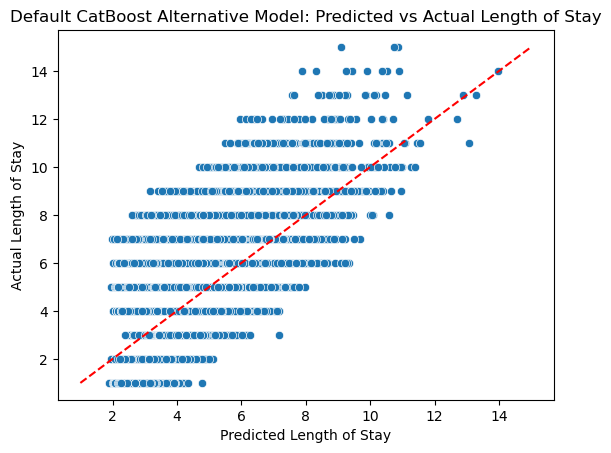

In [36]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_CBalt, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('Default CatBoost Alternative Model: Predicted vs Actual Length of Stay')
plt.show()

In [ ]:
#Perform hyperparameter search on alternative CatBoost model to improve MAE
param_grid_CBalt = {
    'learning_rate': [.001, .005, .01, .03, .05, .1],
    'depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'iterations': [500, 750, 1000, 1250],
    'l2_leaf_reg': [3, 6, 7, 8, 9, 10],
    'random_strength' : [1, 2, 5, 10]
}
CB_model_alt = CatBoostRegressor()
CB_model_alt = RandomizedSearchCV(estimator=CB_model_alt, param_distributions=param_grid_CBalt, cv=5, scoring='neg_mean_absolute_error')

CB_model_alt.fit(X_train_alt, y_train)

0:	learn: 2.3591418	total: 37.4ms	remaining: 28s
1:	learn: 2.3548419	total: 67.2ms	remaining: 25.1s
2:	learn: 2.3508534	total: 90.1ms	remaining: 22.4s
3:	learn: 2.3468194	total: 120ms	remaining: 22.3s
4:	learn: 2.3428060	total: 158ms	remaining: 23.6s
5:	learn: 2.3388694	total: 192ms	remaining: 23.9s
6:	learn: 2.3350502	total: 221ms	remaining: 23.5s
7:	learn: 2.3311631	total: 255ms	remaining: 23.7s
8:	learn: 2.3275162	total: 298ms	remaining: 24.6s
9:	learn: 2.3233237	total: 334ms	remaining: 24.7s
10:	learn: 2.3194385	total: 366ms	remaining: 24.6s
11:	learn: 2.3158121	total: 397ms	remaining: 24.4s
12:	learn: 2.3117430	total: 422ms	remaining: 23.9s
13:	learn: 2.3083012	total: 446ms	remaining: 23.4s
14:	learn: 2.3045537	total: 476ms	remaining: 23.3s
15:	learn: 2.3009187	total: 512ms	remaining: 23.5s
16:	learn: 2.2970951	total: 564ms	remaining: 24.3s
17:	learn: 2.2936693	total: 622ms	remaining: 25.3s
18:	learn: 2.2899548	total: 667ms	remaining: 25.7s
19:	learn: 2.2869744	total: 713ms	remain

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001D75CE17BF0>,
                   param_distributions={'depth': [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                  12],
                                        'iterations': [500, 750, 1000, 1250],
                                        'l2_leaf_reg': [3, 6, 7, 8, 9, 10],
                                        'learning_rate': [0.001, 0.005, 0.01,
                                                          0.03, 0.05, 0.1],
                                        'random_strength': [1, 2, 5, 10]},
                   scoring='neg_mean_absolute_error')

In [17]:
results_CBalt = pd.DataFrame(CB_model_alt.cv_results_)
top_10_CBalt = results_CBalt.sort_values(by='mean_test_score', ascending=False).head(10)
params_expanded = pd.json_normalize(top_10_CBalt['params'])
top_10_CBalt_full = pd.concat([top_10_CBalt[["rank_test_score", "mean_test_score"]].reset_index(drop=True), params_expanded.reset_index(drop=True)], axis=1)
top_10_CBalt_full['Mean MAE'] = top_10_CBalt_full['mean_test_score']*-1
top_10_CBalt_full = top_10_CBalt_full.drop('mean_test_score', axis=1)
top_10_CBalt_full

rank_test_score  random_strength  learning_rate  l2_leaf_reg  iterations  \
0                1                5          0.050            9        1000   
1                2                2          0.030            9        1250   
2                3                2          0.030            8        1000   
3                4               10          0.050            9         500   
4                5               10          0.050            9        1250   
5                6               10          0.100            6        1000   
6                7                1          0.005            6        1250   
7                8                5          0.010            8         750   
8                9               10          0.010           10        1000   
9               10                2          0.005            6         500   

   depth  Mean MAE  
0      7  1.539296  
1      7  1.539451  
2      6  1.540211  
3     10  1.544647  
4      3  1.545782  
5     10  1.553872  
6     10  1.557055  
7      8  1.577104  
8      6  1.587467  
9     10  1.619350

In [37]:
#Train alternative model with tuned hyperparameters
CB_alt_model = CatBoostRegressor(learning_rate=.05, l2_leaf_reg=9, iterations=1000, depth=7)
CB_alt_model = CB_alt_model.fit(X_train_alt, y_train)
y_pred_CBalt_model = CB_alt_model.predict(X_test)

0:	learn: 2.3357462	total: 93.2ms	remaining: 1m 33s
1:	learn: 2.3125085	total: 127ms	remaining: 1m 3s
2:	learn: 2.2914142	total: 153ms	remaining: 50.8s
3:	learn: 2.2725250	total: 177ms	remaining: 44s
4:	learn: 2.2550607	total: 200ms	remaining: 39.8s
5:	learn: 2.2387537	total: 223ms	remaining: 37s
6:	learn: 2.2234971	total: 248ms	remaining: 35.1s
7:	learn: 2.2088453	total: 271ms	remaining: 33.6s
8:	learn: 2.1955500	total: 296ms	remaining: 32.6s
9:	learn: 2.1829230	total: 338ms	remaining: 33.4s
10:	learn: 2.1711981	total: 372ms	remaining: 33.4s
11:	learn: 2.1601887	total: 400ms	remaining: 32.9s
12:	learn: 2.1500733	total: 423ms	remaining: 32.1s
13:	learn: 2.1403728	total: 450ms	remaining: 31.7s
14:	learn: 2.1313869	total: 470ms	remaining: 30.9s
15:	learn: 2.1221032	total: 489ms	remaining: 30.1s
16:	learn: 2.1133717	total: 507ms	remaining: 29.3s
17:	learn: 2.1049418	total: 526ms	remaining: 28.7s
18:	learn: 2.0970033	total: 578ms	remaining: 29.8s
19:	learn: 2.0896202	total: 686ms	remaining

In [38]:
Rsquared_CBalt_model = CB_alt_model.score(X_train_alt, y_train)
mea_CBalt_model = mean_absolute_error(y_test, y_pred_CBalt_model)
RMSE_CBalt_model = root_mean_squared_error(y_test, y_pred_CBalt_model)
CB_alt_metrics_model = {'R-squared': Rsquared_CBalt_model, 'MAE': mea_CBalt_model, 'RMSE':RMSE_CBalt_model}
CB_alt_metrics_model

{'R-squared': np.float64(0.43399838638932287),
 'MAE': 1.5346303896819808,
 'RMSE': 1.8530455426999852}

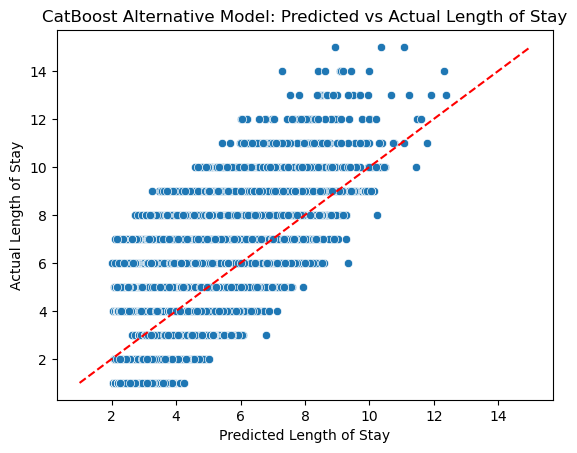

In [39]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_CBalt_model, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('CatBoost Alternative Model: Predicted vs Actual Length of Stay')
plt.show()

In [40]:
#Calculate the relative features importances using permutation_importance
perm_CB_model = permutation_importance(CB_alt_model, X_test_alt, y_test, n_repeats=10, random_state=42, n_jobs=2)

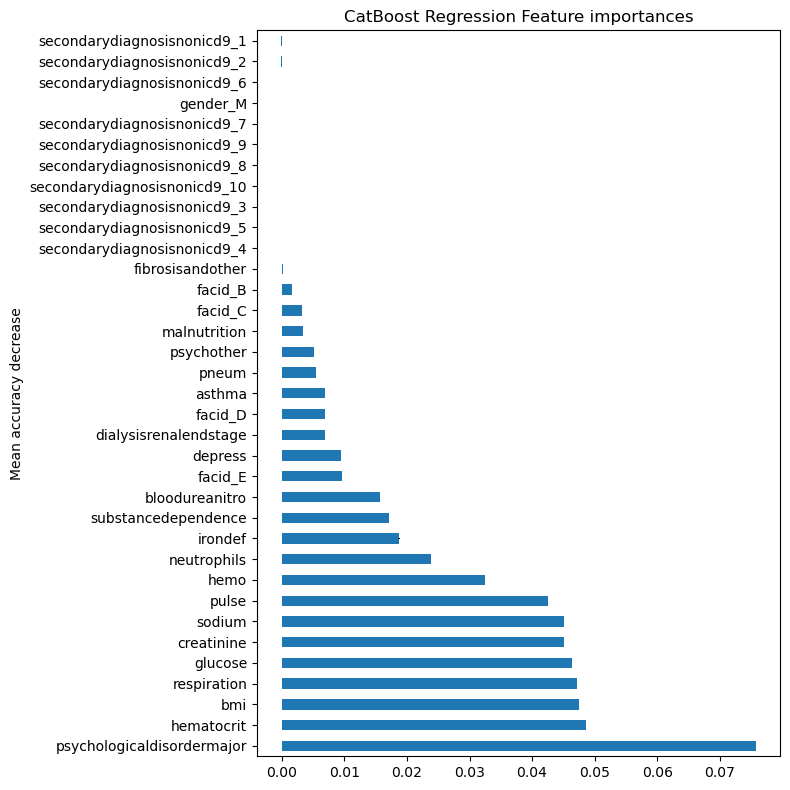

In [41]:
#Transform feature importance data into series for plotting
feature_names_alt = X_test_alt.columns
importances_mean_CB = pd.Series(perm_CB_model.importances_mean, index=feature_names_alt).sort_values(ascending=False)
importances_std_CB = pd.Series(perm_CB_model.importances_std, index=feature_names_alt).loc[importances_mean_CB.index]

#Plot feature importances
fig, ax = plt.subplots(figsize=(8,8))
importances_mean_CB.plot.barh(yerr=importances_std_CB, ax=ax)
ax.set_title("CatBoost Regression Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

For this alternative model, the MAE was predictably much higher and could not be brought below 1.5 days.  Due to this unavoidable error, we would not recommend removing any of the features from this model, as was possible for the primary model which included the readmission number.  

Below, I will compare the alterative model to the primary model when readmission number is unavailable and has been set to 0 as a default.

In [27]:
X_test_0 = X_test.copy()
X_test_0['readmission_int'] = 0

In [31]:
#Determine MAE with test data where readmission_int has been set to 0
y_pred_CB = np.array(CB.predict(X_test_0))
mae_CB = mean_absolute_error(y_test, y_pred_CB)
print(f'CatBoost Regressor MAE: {mae_CB}')

CatBoost Regressor MAE: 1.4338709591270404


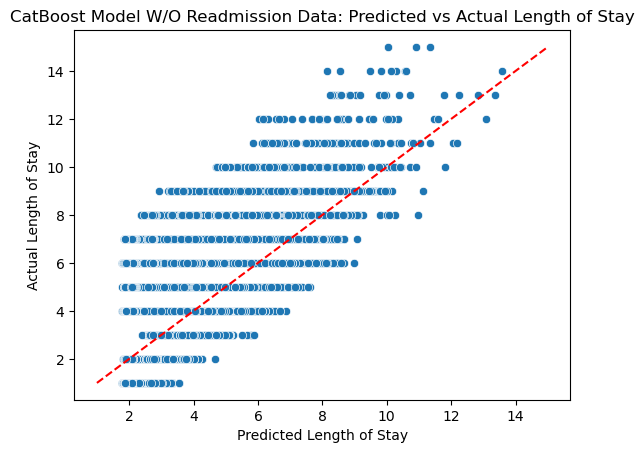

In [32]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_CB, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('CatBoost Model W/O Readmission Data: Predicted vs Actual Length of Stay')
plt.show()

Even without the number of readmissions, the CatBoost learner that was able to train on the full X_train performs better than the alternative learner, with an MAE of 1.43.  This shows that the alternative model cannot be justified.

# Summary

This notebook describes how a model was built to predict the length of ICU admssions from the dataset `LengthOfStay.csv`.  This was acheived through the following steps:
1. Testing seven regression learners with default hyperparatmeters 
    - Learners were evaluated by MAE and R-squared, as well the subjective tendency to maintain accuracy for predicting admission over 10 days
    - CatBoost Regressor was the top candidate and was selected along with XGBoost and Random Forest
2. Hyperparameter tuning and model building for the top three learners
    - Hyperparatmeter tuning was done with RandomSearchCV over a purposefully broad range of values and parameters for each model, making sure that default value were included with the hyperparatmeter space
    - Hyperparameter tuning yielded modest improvements in MAE for all models, but had the side-effect of increasing MAE for longer stays at the expense of MAE over the entire testing dataset
    - CatBoost Regressor with default hyperparameters was the learner with the lower MAE for admissions of 10 or more days of all the learners tested
3. CatBoost Regressor with default settings was selected for the final model
    - To optimize efficiency, this model can be limited to the top 20 features without increasing the error
    - This model can operate with the top 15 features if desired with modest increases in error
    - An alternative model wihtout the `reamission_int` was tested to determine if this was necessary to make predictions for patients with an unknown number of readmissions.  However, the initial model trained with the complete data set still performed better with a lower MAE when `readmission_int` was set to 0 in the test data.

In [ ]:
#save final model
CB.save_model("CatBoostRegressor_LoS_model.cbm")

In [143]:
# Define shorted training data sets
X_train_15 = X_train[importances_mean_CB.index[:15]]
X_train_20 = X_train[importances_mean_CB.index[:20]]
X_test_15 = X_test[importances_mean_CB.index[:15]]
X_test_20 = X_test[importances_mean_CB.index[:20]]

In [144]:
# save the data to a new csv file
datapath = 'C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2'
save_file(X_train_15, 'LengthOfStay_Xtrain_15.csv', datapath)
save_file(X_train_20, 'LengthOfStay_Xtrain_20.csv', datapath)
save_file(X_test_15, 'LengthOfStay_Xtest_15.csv', datapath)
save_file(X_test_20, 'LengthOfStay_Xtest_20.csv', datapath)


A file already exists with this name.

Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_Xtrain_15.csv"
A file already exists with this name.

Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_Xtrain_20.csv"
Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_Xtest_15.csv"
Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_Xtest_20.csv"
